In [164]:
using JuMP, CPLEX, LinearAlgebra, DelimitedFiles, Plots, LinA
plotly()
mc = readdlm("mcMeleeModel.csv", ',', Float64)
mc= round.(mc, digits=2)
usage = [readdlm("communityDistribution.csv", ',', Float64)...];


┌ Info: For saving to png with the Plotly backend ORCA has to be installed.
└ @ Plots C:\Users\julie\.julia\packages\Plots\8GUYs\src\backends.jl:363


In [49]:
#Basic Model

model = Model(CPLEX.Optimizer)
MOI.set(model, MOI.Silent(), true)
@variable model x[1:26] >= 0

@objective model Max x'*mc*usage
@constraint model sum(x) == 1
optimize!(model)
println(value.(x)')

objective_value(model)

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]


0.595757675071296

In [50]:
model = Model(CPLEX.Optimizer)
MOI.set(model, MOI.Silent(), true)
@variable model x[1:26] >= 0

σ(x) = 1 /(1 +exp(-5x))
learningRate(x) = 2σ(x)-1
lrLin = Linearize(learningRate,0,1,Relative(1))
nbpiece=length(lrLin)

@variable model active[1:26,1:nbpiece] binary = true
@variable model f[1:26,1:nbpiece] >= 0

#only one piece has weight
for i in 1:26
    @constraint model sum(active[i,:]) <= 1
end

#binding piece with activation
for i=1:26,j=1:nbpiece
    @constraint model f[i,j] - lrLin[j].xMin*active[i,j] >= 0
    @constraint model f[i,j] - lrLin[j].xMax*active[i,j] <= 0
end

#constraint probability distribution

@constraint model sum(f) == 1

#function to optimize
α = 0
for i=1:26,j=1:nbpiece    
    α += (mc*usage)[i]*(lrLin[j].a*f[i,j] + lrLin[j].b*active[i,j])
end

@objective model Max α

optimize!(model)

playrates = sum(value.(f),dims=2)

26×1 Array{Float64,2}:
 0.0
 0.0
 0.10107707395808575
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.06967701380941511
 0.0
 0.0
 0.2227834684839847
 0.0
 0.10107707395808575
 0.10107707395808575
 0.10107707395808575
 0.0
 0.10107707395808575
 0.10107707395808575
 0.0
 0.0
 0.0
 0.0
 0.0
 0.10107707395808575

In [165]:
bar(playrates,legend=false,ylabel="Utilisation %")

<!DOCTYPE html>
 
 
 Plots.jl

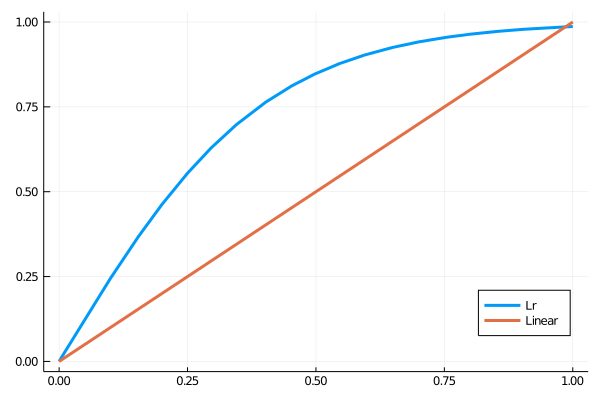

In [37]:
plot([learningRate x->x],0,1,label=["Lr" "Linear"],legend=:bottomright,lw = 3)

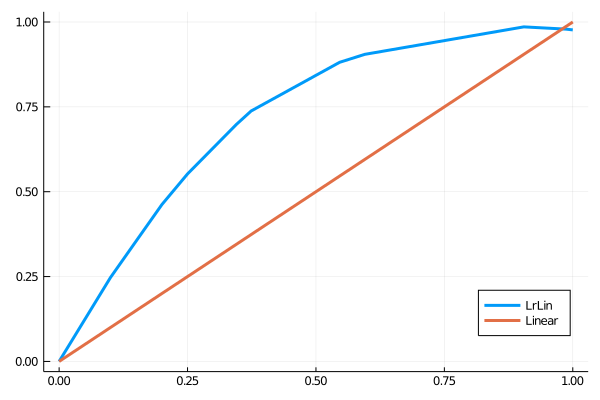

In [38]:
plot([x->lrLin(x) x->x],0,1,label=["LrLin" "Linear"],lw = 3,legend=:bottomright)

In [128]:
using IterTools

In [125]:
wasd =zeros(2,3,4,5);

In [138]:
for p in product([1:x for x=size(wasd)]...)
    print(wasd[p...])
end

0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0

┌ Warning: `product(xss...)` is deprecated, use `Iterators.product(xss...)` instead.
│   caller = top-level scope at In[138]:1
└ @ Core In[138]:1


In [134]:
wasd[6]

0.0

In [140]:
1 .: size(wasd)

LoadError: syntax: space before "." not allowed in "1 ." at none:1

In [163]:
getindex.([wasd],[product(range.(1,size(wasd),step=1))])

┌ Warning: `product(xss...)` is deprecated, use `Iterators.product(xss...)` instead.
│   caller = top-level scope at In[163]:1
└ @ Core In[163]:1


ArgumentError: ArgumentError: invalid index: Base.Iterators.ProductIterator{Tuple{NTuple{4,StepRange{Int64,Int64}}}}(((1:1:2, 1:1:3, 1:1:4, 1:1:5),)) of type Base.Iterators.ProductIterator{Tuple{NTuple{4,StepRange{Int64,Int64}}}}

In [159]:
product(range.(1,size(wasd),step=1))

┌ Warning: `product(xss...)` is deprecated, use `Iterators.product(xss...)` instead.
│   caller = top-level scope at In[159]:1
└ @ Core In[159]:1


MethodError: MethodError: no method matching getindex(::Base.Iterators.ProductIterator{Tuple{NTuple{4,StepRange{Int64,Int64}}}}, ::Int64)